# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [16]:
from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [17]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [18]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,25,STL,47,44,26,15,3,101,...,2583,26,.591,6,94,6.28,0,0,0,0
1,2,Frederik Andersen,26,ANA,43,37,22,9,7,88,...,2298,24,.649,5,95,4.46,0,1,1,2
2,3,Craig Anderson,34,OTT,60,60,31,23,5,161,...,3477,31,.517,8,99,2.05,0,2,2,0
3,4,Richard Bachman,28,VAN,1,1,1,0,0,3,...,60,0,.000,0,NaN,NaN,0,0,0,0
4,5,Niklas Bäckström,37,CGY,4,3,2,2,0,13,...,233,2,.667,1,NaN,NaN,0,0,0,0


# Section I - Warm Up

In [19]:
import pandas as pd
import numpy as np

In [20]:
players = df.Player.tolist()
print(type(players[1]))
players[:10]

<class 'str'>


['Jake Allen',
 'Frederik Andersen',
 'Craig Anderson',
 'Richard Bachman',
 'Niklas Bäckström',
 'Jonathan Bernier',
 'Reto Berra',
 'Jean-Francois Berube',
 'Jordan Binnington',
 'Ben Bishop']

In [21]:
savePercentages = df["SV%"].astype(float).tolist()
print(type(savePercentages[1]))
savePercentages[:10]

<class 'float'>


[0.92, 0.919, 0.916, 0.903, 0.881, 0.908, 0.922, 0.914, 0.75, 0.926]

In [22]:
len(players)

92

In [23]:
%matplotlib inline

In [35]:
import matplotlib.pyplot as plt

In [40]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['figure.dpi'] = 100 

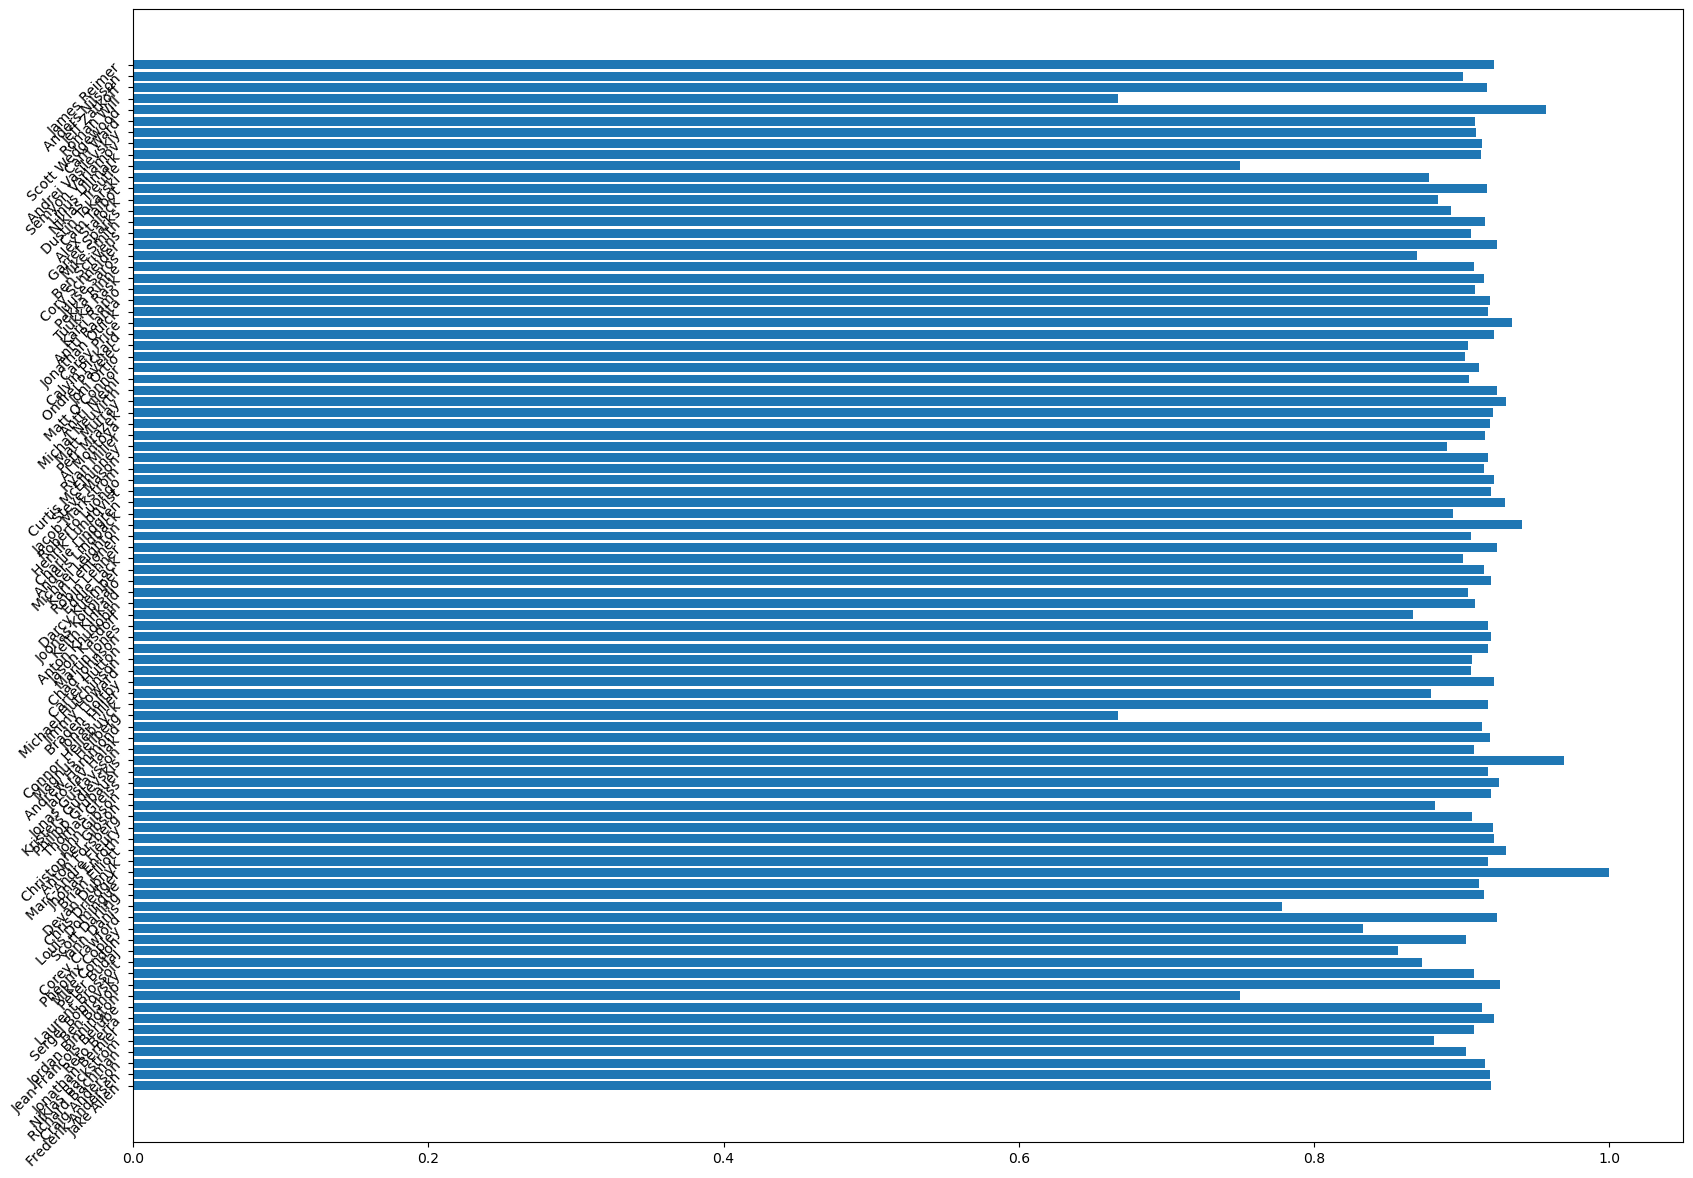

In [41]:
#plt.rcdefaults()
fig, ax = plt.subplots()

y = np.arange(len(players))

ax.barh(y, savePercentages, align='center')
ax.set_yticks(y)
ax.set_yticklabels(players, rotation=45)

plt.show()

In [42]:
goaliesData = { "Player" : players, "SV%" : savePercentages }
goaliesDF = pd.DataFrame(data = goaliesData)


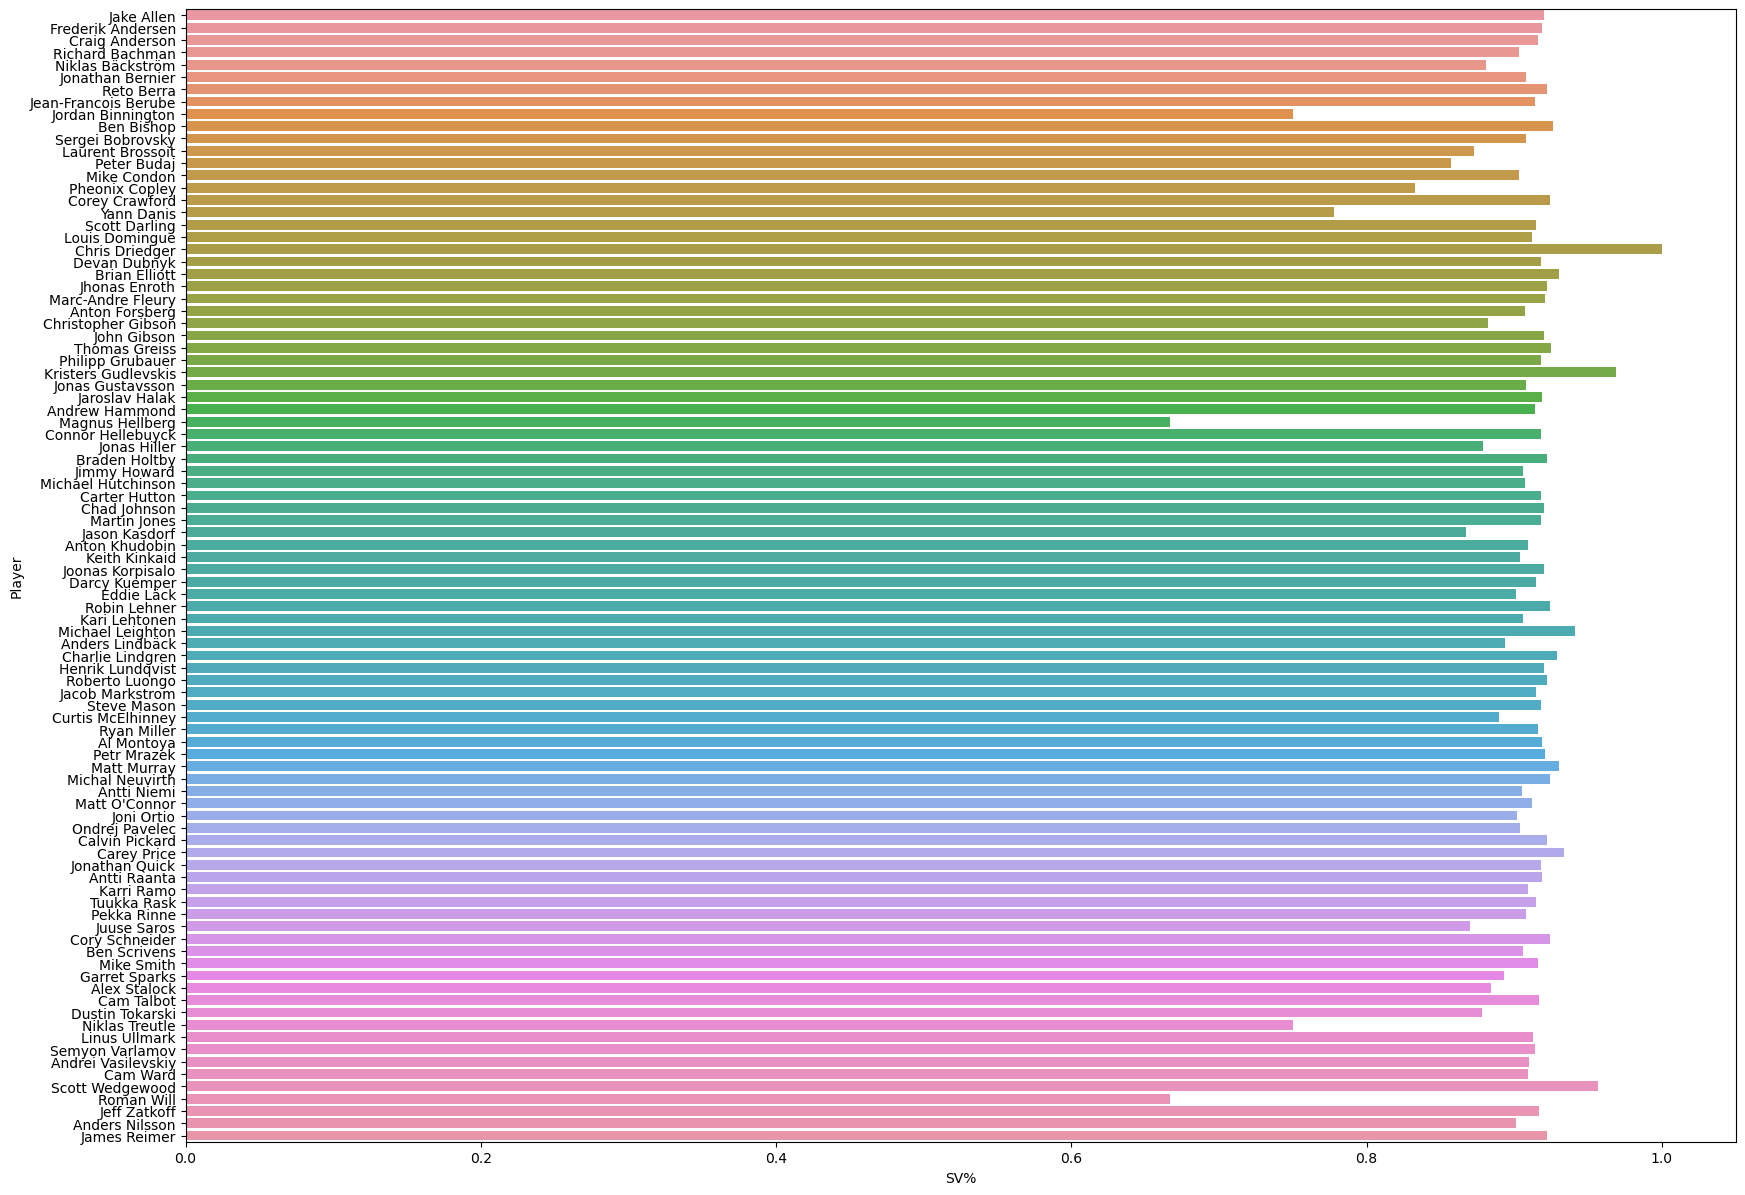

In [43]:
import seaborn as sns
ax = sns.barplot(x="SV%", y="Player", data=goaliesDF )

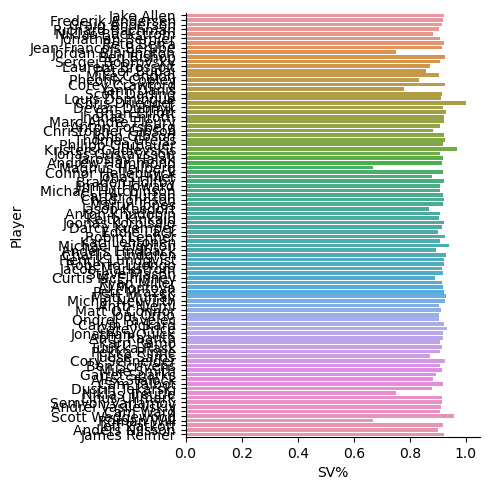

In [34]:
sns.catplot(x="SV%", y="Player", kind="bar", data=goaliesDF )

# Section II - Data Acquisition

download raw data from https://statsapi.web.nhl.com/api/v1/game/[GAME_ID]/feed/live/
manual load into dataframe

Example usage shown and commented below

In [14]:
#imports
from ift6758.data.functions import loadstats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import pandas as pd
import json

#preload and download from web if not acquired (set to false to download all data)
downloaded = True
if not downloaded:
    datayear = 2016
    while datayear <= 2020:
        loadstats(datayear,'./data/')
        datayear += 1
    
#outputs games that aren't played up to 7 in playoffs or max games in regular season
dfs = loadstats(2019,'./data/')
# print(df2019.iloc[:,1270])
# print(df2019['2019020001'])

Error code: 404 at gameID:2016021231. Game not found.
size of data in regular season: 1230
Error code: 404 at gameID:2016030147. Game not found.
Error code: 404 at gameID:2016030176. Game not found.
size of data in regular season & playoffs: 1332
size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size o

In [15]:
# playbyplay shown
pd.DataFrame.from_dict(dfs['2019020001']['liveData']['plays']['allPlays']).head()

,result,about,coordinates,players,team
0,"{'event': 'Game Scheduled', 'eventCode': 'TOR1...","{'eventIdx': 0, 'eventId': 1, 'period': 1, 'pe...",{},NaN,NaN
1,"{'event': 'Period Ready', 'eventCode': 'TOR5',...","{'eventIdx': 1, 'eventId': 5, 'period': 1, 'pe...",{},NaN,NaN
2,"{'event': 'Period Start', 'eventCode': 'TOR8',...","{'eventIdx': 2, 'eventId': 8, 'period': 1, 'pe...",{},NaN,NaN
3,"{'event': 'Faceoff', 'eventCode': 'TOR9', 'eve...","{'eventIdx': 3, 'eventId': 9, 'period': 1, 'pe...","{'x': 0.0, 'y': 0.0}","[{'player': {'id': 8475166, 'fullName': 'John ...","{'id': 10, 'name': 'Toronto Maple Leafs', 'lin..."
4,"{'event': 'Goal', 'eventCode': 'TOR10', 'event...","{'eventIdx': 4, 'eventId': 10, 'period': 1, 'p...","{'x': 85.0, 'y': -1.0}","[{'player': {'id': 8480801, 'fullName': 'Brady...","{'id': 9, 'name': 'Ottawa Senators', 'link': '..."


In [16]:
# raw data shown in first entry
dfs.iloc[:,0]

copyright    NHL and the NHL Shield are registered trademar...
gamePk                                              2019020001
link                         /api/v1/game/2019020001/feed/live
metaData     {'wait': 10, 'timeStamp': '20191106_204348', '...
gameData     {'game': {'pk': 2019020001, 'season': '2019202...
liveData     {'plays': {'allPlays': [{'result': {'event': '...
Name: 2019020001, dtype: object

In [17]:
# number of regular season games
print(dfs.iloc[:,0]['metaData']['playoffIndex'])
# number of total games
print(dfs.shape[1])

1271
1428


# Interactive Debugging Widget

Use the sliders below to see the play by play for each games

In [18]:
#define the playoff index & game size
index = dfs.iloc[:,0]['metaData']['playoffIndex']
gamesize = dfs.shape[1]
# number of plays in game 1 regular season
game1plays = len(dfs.iloc[:,0]['liveData']['plays']['allPlays'])

#game type selector
wType = widgets.RadioButtons(
        options=['Regular', 'PlayOffs'],
        value='Regular', # Defaults to 'Regular'
        #layout={'width': 'max-content'}, # If the items' names are long
        description='Game Type:',
        disabled=False
    )
    
#game selector
wGameIndex = widgets.IntSlider(
    value=0,
    min=0,
    max=index-1,
    step=1,
    description='Game Index:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

#play selector
wPlays = widgets.IntSlider(
        value=0,
        min=0,
        max=game1plays-1,
        step=1,
        description='Play Index:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
)


output2 = widgets.Output()
#debug
#display(wType,wGameIndex,wPlays,output2)

# Define a function that updates the content of GameIndex based on GameType
def on_value_changeT(change):
    if wType.value == 'Regular':
        wGameIndex.min = 0
        wGameIndex.max = max(index-1,0)
        wGameIndex.value=0
    elif wType.value == 'PlayOffs':
        wGameIndex.max = max(gamesize-1,0)
        wGameIndex.min = min(index,0)
        wGameIndex.value = min(wGameIndex.max,wGameIndex.min)
    else:
        print('Game Type Selector Error!')
    #debug
    # with output2:
    #     print(change['new'])
    #     print(wGameIndex.min)
    #     print(wGameIndex.max)

wType.observe(on_value_changeT, names='value')

# Define a function that updates the number of Plays based on GameIndex
def on_value_changeI(change):
    wPlays.value = 0
    wPlays.max = max(len(dfs.iloc[:,wGameIndex.value]['liveData']['plays']['allPlays'])-1,0)
    #debug 
    # with output2:
    #     print(change['new'])
    #     print(wPlays.max)
    #     print(wPlays.value)
        
wGameIndex.observe(on_value_changeI, names='value')

#functions that plots the plays depending on the widget selection
def plotPlay(wTypei, wGameIndexi,wPlaysi):
    
    coordinates = {}
    #print useful info here
    print(f'Gametype: {wTypei}, Game Index: {wGameIndexi}, Play Index: {wPlaysi}')
    print(f'gameID: {dfs.iloc[:,wGameIndexi]["gamePk"]}, time: {dfs.iloc[:,wGameIndexi]["gameData"]["datetime"]["dateTime"]}')
    print(f'Away: {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["away"]["abbreviation"]} vs {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["home"]["abbreviation"]} :Home')
    
    #try to find coordinates of plays
    try:
        coordinates = dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi]['coordinates']
    except Exception as ex:
        print(ex)
    

    #change coordinate system and show image
    img = mpimg.imread('./figures/nhl_rink.png')
    imgplot = plt.imshow(img, extent = [-100 ,100,-42.5,42.5])
    
    #if coordinates exist then plot on image
    if coordinates:
        plt.plot(coordinates['x'],coordinates['y'],'yo', markersize=30)
    plt.show()
    
    #print play info if it exist
    try:
        print(json.dumps(dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi], ensure_ascii=False, indent=4))
    except Exception as ex:
        print(ex)
    
#widget initilizer
widgets.interact(plotPlay,  
    #game type selector
    wTypei = wType,    
    #game selector
    wGameIndexi = wGameIndex,    
    #play selector
    wPlaysi = wPlays,
)



interactive(children=(RadioButtons(description='Game Type:', options=('Regular', 'PlayOffs'), value='Regular')…

<function __main__.plotPlay(wTypei, wGameIndexi, wPlaysi)>